In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.search_manager import SearchManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt

In [2]:
# env params
memorySize = 20
legalMove = 0.1
illegalMove = -0.01
outOfBounds = -0.01
memoryRepeat = 0 #-0.01
goalReached = 1000

# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

In [3]:
# adam_and_eve = []
# env.reset()
# init_team = Team(uuid.uuid4(), 0, 0, 0, 0, 0)
# # init_rule = Rule(uuid.uuid4(), [0, 0, 0, 0], 0, 0)
# # init_learner = Learner(uuid.uuid4(), init_rule)
# # (init_team.learners).append(init_learner)
# # init_team.mostRecent = init_learner
# adam_and_eve.append(init_team)

# for adam in adam_and_eve:
#     print(adam.learners)
#     print('------')
#     adam.init_search(env, [2, 3])
#     print(adam.learners)
#     for learner in adam.learners:
#         print(learner.program.rule.action_set)
#         print(learner.program.rule.region)

In [4]:
numGens = 50
maxTeamPool = 5
# init search manager and starting teams
searchManager = SearchManager(maxTeamPool)

# init_team = Team(uuid.uuid4(), 0, 0, 0, 0, 0)
# init_rule = Rule(uuid.uuid4(), [0, 0, 0, 0], 0, 0)
# init_learner = Learner(uuid.uuid4(), init_rule)
# (init_team.learners).append(init_learner)
# init_team.mostRecent = init_learner
# (searchManager.teamPool).append(init_team)

# init teams
adam_and_eve = []
env.reset()
init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
init_team.init_search(env, [2, 3])
adam_and_eve.append(init_team)
win = False
for adam in adam_and_eve:
#     win = adam.search(env)
    data = [adam, win]
    searchManager.evaluate_team(data)

# print('-----init pop start-----')
# for team in searchManager.teamPool:
#     print(f'Team id: {team.id}')
#     print('Learners:')
#     for learner in team.learners:
#         print(learner.id)
# print('-----init pop end-----')

# variables for tracking fitness, for curves
gens = []
maxes = []
averages = []
mins = []

for gen in range(numGens):
    if win:
        print(f'got to --> gen {gen+1}')
        break
    toEvaluateAfterGen = []
    print(f'>>>>>>>>>>>>>>>>>>>>>>>Gen {gen+1} start!>>>>>>>>>>>>>>>>>>>>>>>')
    # get it started
#     if gen == 0:
#         for adam in adam_and_eve:
#             win = adam.search(env)
#             data = [adam, win]
#             searchManager.evaluate_team(data)
#     else:
    for parent in searchManager.teamPool:
        # only run if the team has not yet won
        if parent not in searchManager.winners:
            print(f'Parent: {parent.id}')
#             print(f'Start: {parent.start_state}')
            env.current_state = parent.start_state

            # make offspring from parent, then let that offspring make a new rule
            child = copy.deepcopy(parent)
            child.id = uuid.uuid4()
            win = child.search(env)
            print(f'Child: {child.id}')
            print('Start Child Regions --------')
            for learner in child.learners:
                print(learner.program.rule.region)
            print('End Child Regions --------')
            print(f'Child Fitness: {child.fitness}') 
            toEvaluateAfterGen.append([child, win])
        else:
            print(f'Skipping Team: {parent.id}')
    for data in toEvaluateAfterGen:
        searchManager.evaluate_team(data)
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print(f'End of Gen {gen+1} Regions')
    for i in range(len(searchManager.teamPool)):
        print(f'Team: {i+1} --> {searchManager.teamPool[i].fitness}')
        for learner in searchManager.teamPool[i].learners:
            print(learner.program.rule.region)
    print(f'>>>>>>>>>>>>>>>>>>>>>>>Gen {gen+1} end!>>>>>>>>>>>>>>>>>>>>>>>')
    # start: manage fitness curves (at end of gen)
    gens.append(gen)
    total = 0
    max_fitness = -100
    min_fitness = 100
#     for team in searchManager.teamPool:
    for data in toEvaluateAfterGen:
        team = data[0]
        total += team.fitness
        if team.fitness > max_fitness:
            max_fitness = team.fitness
        if team.fitness < min_fitness:
            min_fitness = team.fitness
    average_fitness = total / len(searchManager.teamPool)
    maxes.append(max_fitness)
    averages.append(average_fitness)
    mins.append(min_fitness)
    # end: manage fitness curves (at end of gen)
for team in searchManager.winners:
    print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
    print(team.fitness)
    print('Learners:')
    for learner in team.learners:
        print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
    print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

new step-------
3
(0, 3)
new step-------
3
(0, 2)
new step-------
3
(0, 1)
new step-------
3
(0, 0)
new step-------
3
(0, 0)
new step-------
2
(0, 1)
new step-------
2
(0, 2)
new step-------
2
(0, 3)
new step-------
2
(0, 4)
new step-------
2
(0, 4)
[0, 0, 0, 4]
>>>>>>>>>>>>>>>>>>>>>>>Gen 1 start!>>>>>>>>>>>>>>>>>>>>>>>
Parent: 11ef8f03-93d4-447f-92cd-9fd33523712b
Start: (0, 3)
New real step: 
0
(1, 3)
New real step: 
0
(2, 3)
New real step: 
0
(3, 3)
New real step: 
0
(3, 3)
New real step: 
1
(2, 3)
New real step: 
1
(1, 3)
New real step: 
1
(0, 3)
New real step: 
1
(0, 3)
Child: 52b48136-77fb-445b-b229-99e707a37d4e
Start Child Regions --------
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 3]
End Child Regions --------
Child Fitness: 1.2799999999999998
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
End of Gen 1 Regions
Team: 1 --> 0.69
[0, 0, 0, 4]
Team: 2 --> 1.2799999999999998
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 3]
>>>>>>>>>>>>>>>>>>>>>>>Gen 1 end!>>>>>>>>>>>>>>>>>>>>>>>
>>>

Start: (9, 2)
New real step: 
1
(8, 2)
New real step: 
1
(7, 2)
New real step: 
1
(6, 2)
New real step: 
1
(5, 2)
New real step: 
1
(5, 2)
New real step: 
0
(6, 2)
New real step: 
0
(7, 2)
New real step: 
0
(8, 2)
New real step: 
0
(9, 2)
New real step: 
0
(9, 2)
Child: eed6fb1a-02e4-4694-99de-8f40164355ba
Start Child Regions --------
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1, 4]
[1, 0, 8, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 5, 8]
[0, 9, 0, 1]
[0, 9, 3, 3]
[1, 2, 5, 9]
End Child Regions --------
Child Fitness: 5.829999999999999
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
End of Gen 9 Regions
Team: 1 --> 5.529999999999999
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 9]
Team: 2 --> 6.43
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0

[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 1, 3]
[1, 0, 2, 9]
End Child Regions --------
Child Fitness: 8.58
Parent: 02dcba0c-b8c7-4fed-afa2-ccef3741e645
Start: (0, 2)
New real step: 
1
(0, 2)
Backtrackregioncehck: [0, 0, 0, 1]
New real step: 
0
(1, 0)
New real step: 
0
(2, 0)
New real step: 
0
(3, 0)
New real step: 
0
(4, 0)
New real step: 
0
(5, 0)
New real step: 
0
(6, 0)
New real step: 
0
(7, 0)
New real step: 
0
(8, 0)
New real step: 
0
(9, 0)
Child: 996331d5-6a1b-4179-8a0a-39f6ffc28e29
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 2, 2]
[0, 1, 0, 1]
[0, 1, 3, 4]
[1, 2, 0, 0]
[1, 2, 2, 3]
[0, 1, 0, 3]
[0, 1, 5, 4]
[1, 4, 1, 3]
[0, 0, 0, 0]
[0, 0, 3, 4]
[1, 0, 0, 8]
End Child Regions --------
Child Fitness: 8.18
Parent: 1b732945-7b4e-4f25-9a37-f66fe51419fe
Start: (6, 0)
New real step: 
0
(7, 0)
New real step: 
0
(8, 0)
New real step: 
0
(9, 0)
New real step: 
0

[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 9]
Team: 5 --> 10.559999999999999
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1, 4]
[1, 0, 8, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 5, 8]
[0, 9, 0, 1]
[0, 9, 3, 3]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 3]
[0, 6, 5, 5]
[1, 4, 5, 7]
[1, 4, 9, 9]
[0, 8, 0, 3]
[0, 8, 5, 4]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 1, 5]
[1, 0, 4, 6]
[0, 7, 0, 5]
>>>>>>>>>>>>>>>>>>>>>>>Gen 16 end!>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>Gen 17 start!>>>>>>>>>>>>>>>>>>>>>>>
Parent: 69e8073b-0e11-473c-bcd9-54dd7579b073
Start: (8, 2)
New real step: 
0
(9, 2)
New real step: 
0
(9, 2)
New real step: 
1
(8, 2)
New real step: 
1
(7, 2)
New real step: 
1
(6, 2)
New real step: 
1
(5, 2)
New real step: 
1
(5, 2)
Child: cb6cde79-f327-47de-9b8d-8a15f4f41383
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9

(9, 0)
New real step: 
0
(9, 0)
New real step: 
0
(9, 0)
New real step: 
0
(9, 0)
New real step: 
0
(9, 0)
New real step: 
0
(9, 0)
New real step: 
0
(9, 0)
Child: 91238428-1d04-4059-bdd5-33902d477561
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 9]
End Child Regions --------
Child Fitness: 13.119999999999997
Parent: 67850917-ee76-414e-acbc-3d74f9aedaba
Start: (5, 1)
New real step: 
2
(5, 2)
New real step: 
2
(5, 3)
New real step: 
2
(5, 4)
New real step: 
2
(5, 5)
New real step: 
2
(5, 6)
New real step: 
2
(5, 7)
New real step: 
2
(5, 7)
New real step: 
3
(5

[0, 7, 4, 5]
[1, 3, 5, 7]
[1, 3, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 5]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 3]
[0, 6, 5, 5]
[1, 4, 5, 8]
[0, 9, 6, 6]
[1, 6, 6, 7]
[1, 6, 9, 9]
[0, 8, 0, 2]
>>>>>>>>>>>>>>>>>>>>>>>Gen 22 end!>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>Gen 23 start!>>>>>>>>>>>>>>>>>>>>>>>
Parent: 99d28232-797e-4775-af43-20b5370b8ee9
Start: (6, 8)
New real step: 
0
(7, 8)
New real step: 
0
(8, 8)
New real step: 
0
(9, 8)
New real step: 
0
(9, 8)
New real step: 
1
(8, 8)
New real step: 
1
(7, 8)
New real step: 
1
(6, 8)
New real step: 
1
(6, 8)
Child: 4223f537-c882-4a6a-b2eb-3dfe295df25d
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 

[1, 3, 6, 9]
[0, 5, 0, 0]
[0, 5, 4, 5]
[1, 1, 5, 4]
[1, 1, 6, 9]
[0, 5, 5, 4]
[0, 5, 6, 7]
[1, 5, 5, 8]
[0, 9, 0, 0]
[0, 9, 2, 3]
[1, 1, 0, 0]
[1, 1, 2, 9]
[0, 1, 0, 4]
Team: 2 --> 16.24
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 6]
[1, 2, 8, 9]
[0, 7, 0, 2]
[0, 7, 4, 5]
[1, 3, 5, 7]
[1, 3, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 5]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 3]
[0, 6, 5, 5]
[1, 4, 5, 8]
[0, 9, 6, 6]
[1, 6, 6, 7]
[1, 6, 9, 9]
[0, 8, 0, 0]
[0, 8, 2, 2]
[1, 1, 1, 0]
[0, 0, 0, 1]
[0, 0, 3, 4]
[1, 2, 0, 3]
Team: 3 --> 16.669999999999995
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1, 4]
[1, 0, 8, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 5, 8]
[0, 9, 0, 1]
[0, 9, 3, 3]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 3]
[0, 6, 5, 5]
[1, 4, 5, 7]
[1, 4, 9, 9]
[0, 8, 0, 3]
[0, 8, 5, 4]
[1

[0, 8, 0, 0]
[0, 8, 2, 2]
[1, 1, 1, 0]
[0, 0, 0, 1]
[0, 0, 3, 4]
[1, 2, 1, 3]
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 4]
[1, 0, 6, 8]
[0, 5, 6, 7]
End Child Regions --------
Child Fitness: 18.409999999999997
Parent: a4bab752-4569-4e43-a0c8-ee0bdd651e46
Start: (7, 3)
New real step: 
3
(7, 2)
New real step: 
3
(7, 1)
New real step: 
3
(7, 0)
New real step: 
3
(7, 0)
New real step: 
2
(7, 1)
New real step: 
2
(7, 2)
New real step: 
2
(7, 3)
New real step: 
2
(7, 4)
New real step: 
2
(7, 5)
New real step: 
2
(7, 5)
Child: 1939621a-8ada-447f-b5e0-646f65d7b4d4
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8

Start: (8, 2)
New real step: 
2
(8, 3)
New real step: 
2
(8, 4)
New real step: 
2
(8, 5)
New real step: 
2
(8, 5)
New real step: 
3
(8, 4)
New real step: 
3
(8, 3)
New real step: 
3
(8, 2)
New real step: 
3
(8, 1)
New real step: 
3
(8, 0)
New real step: 
3
(8, 0)
Child: 762211fb-7aed-435b-b8ba-0d0dd6d690cf
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 7]
[1, 2, 9, 9]


(2, 6)
New real step: 
0
(3, 6)
New real step: 
0
(4, 6)
Child: d217dcbb-362a-4e5e-91d4-a1ed6d3825dd
Start Child Regions --------
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1, 4]
[1, 0, 8, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 5, 8]
[0, 9, 0, 1]
[0, 9, 3, 3]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 3]
[0, 6, 5, 5]
[1, 4, 5, 7]
[1, 4, 9, 9]
[0, 8, 0, 3]
[0, 8, 5, 4]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 1, 5]
[1, 0, 4, 6]
[0, 7, 0, 2]
[0, 7, 4, 5]
[1, 3, 5, 4]
[1, 3, 6, 9]
[0, 5, 0, 0]
[0, 5, 4, 5]
[1, 1, 5, 4]
[1, 1, 6, 9]
[0, 5, 5, 4]
[0, 5, 6, 7]
[1, 5, 5, 8]
[0, 9, 3, 3]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 7]
[1, 0, 9, 9]
[0, 8, 2, 2]
[0, 8, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 0, 5]
[0, 5, 7, 6]
[1, 6, 0, 3]
End Child Regions --------
Child Fitness: 20.90999999999999
Parent: 071d7669-f9f8-4265-85e4-a3f38563c1f0
Start: (3, 0)
New real step: 
1
(2, 0)
New real step: 
1
(1, 0)
New real step: 
1
(0, 0)
New real step

[0, 8, 5, 4]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 1, 5]
[1, 0, 4, 6]
[0, 7, 0, 2]
[0, 7, 4, 5]
[1, 3, 5, 4]
[1, 3, 6, 9]
[0, 5, 0, 0]
[0, 5, 4, 5]
[1, 1, 5, 4]
[1, 1, 6, 9]
[0, 5, 5, 4]
[0, 5, 6, 7]
[1, 5, 5, 8]
[0, 9, 3, 3]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 7]
[1, 0, 9, 9]
[0, 8, 2, 2]
[0, 8, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 0, 5]
[0, 5, 7, 6]
[1, 6, 0, 0]
[1, 6, 2, 3]
[0, 1, 6, 9]
End Child Regions --------
Child Fitness: 21.49999999999999
Parent: 68715314-30d5-42f5-b389-5f22508cb050
Start: (3, 7)
New real step: 
0
(4, 7)
New real step: 
0
(5, 7)
New real step: 
0
(6, 7)
New real step: 
0
(7, 7)
New real step: 
0
(8, 7)
New real step: 
0
(9, 7)
New real step: 
0
(9, 7)
New real step: 
1
(8, 7)
New real step: 
1
(7, 7)
New real step: 
1
(6, 7)
Child: 02c605ff-3b52-4748-b8e6-3b842419c718
Start Child Regions --------
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1, 4]
[1, 0, 8, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]

New real step: 
1
(6, 8)
New real step: 
1
(6, 8)
New real step: 
0
(7, 8)
New real step: 
0
(8, 8)
New real step: 
0
(9, 8)
New real step: 
0
(9, 8)
Child: d184ec75-ef31-40e5-9fb9-242906c795fa
Start Child Regions --------
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1, 4]
[1, 0, 8, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 5, 8]
[0, 9, 0, 1]
[0, 9, 3, 3]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 3]
[0, 6, 5, 5]
[1, 4, 5, 7]
[1, 4, 9, 9]
[0, 8, 0, 3]
[0, 8, 5, 4]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 1, 5]
[1, 0, 4, 6]
[0, 7, 0, 2]
[0, 7, 4, 5]
[1, 3, 5, 4]
[1, 3, 6, 9]
[0, 5, 0, 0]
[0, 5, 4, 5]
[1, 1, 5, 4]
[1, 1, 6, 9]
[0, 5, 5, 4]
[0, 5, 6, 7]
[1, 5, 5, 8]
[0, 9, 3, 3]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 7]
[1, 0, 9, 9]
[0, 8, 2, 2]
[0, 8, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 0, 5]
[0, 5, 7, 6]
[1, 6, 3, 3]
[0, 3, 6, 6]
[0, 3, 8, 9]
[1, 7, 7, 7]
[1, 7, 9, 9]
[0, 8, 7, 7]
[0, 8, 9, 9]
[1, 8, 6, 9]
End Child Regions -----

[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 1, 5]
[1, 0, 4, 6]
[0, 7, 0, 2]
[0, 7, 4, 5]
[1, 3, 5, 4]
[1, 3, 6, 9]
[0, 5, 0, 0]
[0, 5, 4, 5]
[1, 1, 5, 4]
[1, 1, 6, 9]
[0, 5, 5, 4]
[0, 5, 6, 7]
[1, 5, 5, 8]
[0, 9, 3, 3]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 7]
[1, 0, 9, 9]
[0, 8, 2, 2]
[0, 8, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 0, 5]
[0, 5, 7, 6]
[1, 6, 3, 3]
[0, 3, 6, 6]
[0, 3, 8, 9]
[1, 7, 7, 7]
[1, 7, 9, 9]
[0, 8, 7, 7]
[0, 8, 9, 9]
[1, 8, 6, 8]
[0, 9, 2, 6]
[0, 9, 8, 9]
[1, 7, 0, 9]
End Child Regions --------
Child Fitness: 24.839999999999986
Parent: 4f55c9a6-24af-44de-ad2f-90f0d2c5f316
Start: (6, 1)
New real step: 
3
(6, 0)
New real step: 
3
(6, 0)
New real step: 
2
(6, 1)
New real step: 
2
(6, 2)
New real step: 
2
(6, 3)
New real step: 
2
(6, 4)
New real step: 
2
(6, 5)
New real step: 
2
(6, 5)
Child: d8a81f14-e7e6-42e2-a693-18d220fa2ca7
Start Child Regions --------
[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1,

[1, 1, 6, 9]
[0, 5, 5, 4]
[0, 5, 6, 7]
[1, 5, 5, 8]
[0, 9, 3, 3]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 7]
[1, 0, 9, 9]
[0, 8, 2, 2]
[0, 8, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 0, 5]
[0, 5, 7, 6]
[1, 6, 3, 3]
[0, 3, 6, 6]
[0, 3, 8, 9]
[1, 7, 7, 8]
[0, 9, 0, 0]
[0, 9, 2, 1]
[1, 1, 0, 5]
[1, 1, 7, 9]
[0, 6, 1, 5]
[1, 0, 0, 2]
Team: 4 --> 25.15999999999999
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4

[1, 4, 5, 6]
[1, 4, 8, 9]
[0, 7, 1, 4]
[1, 0, 1, 1]
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 0]
[1, 0, 3, 8]
[0, 0, 0, 4]
End Child Regions --------
Child Fitness: 26.33999999999999
Parent: fb17d8d9-e2d0-4a4d-960d-7b6527abacfe
Start: (7, 2)
New real step: 
1
(6, 2)
New real step: 
1
(5, 2)
New real step: 
1
(5, 2)
New real step: 
0
(6, 2)
New real step: 
0
(7, 2)
New real step: 
0
(8, 2)
New real step: 
0
(9, 2)
New real step: 
0
(9, 2)
Child: 47ed528a-2fa3-4a9b-8ead-e794bdb93fce
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 

[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 2]
[1, 0, 6, 9]
[0, 3, 0, 0]
[0, 3, 4, 4]
[1, 1, 3, 4]
[1, 1, 6, 9]
[0, 5, 0, 3]
[0, 5, 5, 7]
[1, 4, 5, 6]
[1, 4, 8, 9]
[0, 7, 1, 4]
[1, 0, 0, 0]
[1, 0, 2, 1]
[0, 1, 0, 0]
[0, 1, 2, 4]
[1, 1, 0, 0]
[1, 1, 2, 7]
[0, 1, 0, 0]
[0, 1, 2, 4]
[1, 1, 9, 8]
[0, 9, 0, 7]
End Child Regions --------
Child Fitness: 28.219999999999988
Parent: 29da7dfd-5857-4f08-aafa-ed51d4b653b8
Start: (6, 0)
New real 

[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 2]
[1, 0, 6, 9]
[0, 3, 0, 0]
[0, 3, 4, 4]
[1, 1, 3, 4]
[1, 1, 6, 9]
[0, 5, 0, 3]
[0, 5, 5, 7]
[1, 4, 5, 6]
[1, 4, 8, 9]
[0, 7, 1, 4]
[1, 0, 0, 0]
[1, 0, 2, 1]
[0, 1, 0, 0]
[0, 1, 2, 4]
[1, 1, 0, 6]
[1, 1, 8, 7]
[0, 7, 1, 1]
[0, 7, 3, 5]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 1, 5]
[1, 0, 1, 2]
[0, 0, 0, 4]
Team: 3 --> 29.009999999999987
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 

Start: (1, 0)
New real step: 
1
(0, 0)
New real step: 
1
(0, 0)
New real step: 
0
(1, 0)
New real step: 
0
(2, 0)
New real step: 
0
(3, 0)
New real step: 
0
(4, 0)
New real step: 
0
(5, 0)
New real step: 
0
(6, 0)
New real step: 
0
(7, 0)
New real step: 
0
(8, 0)
Child: ad26c1b7-2c6b-44c4-aadf-0eb4081e851f
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 7]
[1, 2, 9, 9]


[1, 4, 0, 3]
End Child Regions --------
Child Fitness: 31.57999999999998
Parent: ad26c1b7-2c6b-44c4-aadf-0eb4081e851f
Start: (6, 0)
New real step: 
3
(6, 0)
Backtrackregioncehck: [1, 0, 0, 5]
New real step: 
2
(4, 1)
New real step: 
2
(4, 1)
Child: f5a3a088-231f-4826-bc9c-4988c996411a
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2,

[0, 7, 1, 1]
[0, 7, 3, 5]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 1, 5]
[1, 0, 1, 2]
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 1, 0, 0]
[1, 1, 2, 9]
[0, 1, 0, 3]
[0, 1, 5, 4]
[1, 4, 0, 3]
Team: 5 --> 32.179999999999986
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 2]
[1, 0, 6, 9]
[0, 3, 0, 0]
[0, 3, 4, 4]
[1, 1, 3, 4]
[1, 1, 6, 9]
[0, 5, 0, 3]
[0, 5, 5, 7]
[1, 4, 5, 6]
[1, 4, 

Child: eda380c0-be86-4f28-927b-16785bb405d8
Start Child Regions --------
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 0, 0, 5]
[1, 0, 9, 8]
[0, 6, 0, 4]
[0, 6, 6, 5]
[1, 5, 5, 5]
[1, 5, 7, 9]
[0, 6, 1, 3]
[1, 0, 0, 0]
[1, 0, 3, 2]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 9, 9]
[1, 5, 6, 7]
[1, 5, 9, 9]
[0, 8, 0, 1]
[0, 8, 3, 3]
[1, 2, 5, 4]
[1, 2, 6, 9]
[0, 5, 4, 6]
[0, 5, 8, 7]
[1, 7, 0, 1]
[1, 7, 3, 3]
[0, 2, 6, 6]
[0, 2, 9, 9]
[1, 6, 2, 4]
[1, 6, 6, 5]
[0, 5, 0, 0]
[0, 5, 2, 2]
[1, 1, 5, 8]
[0, 9, 0, 0]
[0, 9, 4, 7]
[1, 0, 9, 8]
[0, 9, 0, 3]
[0, 9, 5, 9]
[1, 4, 5, 5]
[1, 4, 7, 9]
[0, 6, 0, 1]
[0, 6, 3, 4]
[1, 2, 5, 5]
[1, 2, 7, 9]
[0, 6, 0, 2]
[0, 6, 4, 5]
[1, 3, 5, 6]
[1, 3, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 7]
[1, 2, 9, 9]
[0, 8, 1, 5]
[1, 0, 2, 2]
[1, 0, 6, 9]
[0, 3, 0, 0]
[0, 3, 4, 4]
[1, 1, 3, 4]
[1, 1, 6, 9]
[0, 5, 0, 3]
[0, 5, 5, 7]
[1, 4, 5, 6]
[1, 4, 8, 9]
[0, 7, 1, 4]
[1, 0, 0, 0]
[1, 0, 2, 1]
[0, 1, 0, 0]
[0, 1, 2, 4]
[1, 1, 0, 6]
[1, 1, 8, 7]
[0, 7, 1, 1]
[0, 7, 3, 5]
[1, 

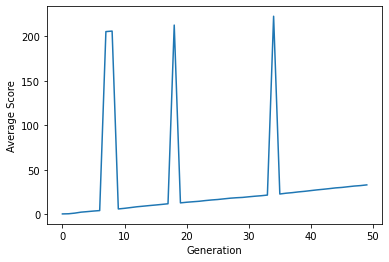

In [5]:
#fitness curves
x = []
y = []
for gen in gens:
    x.append(gen)

for average in averages:
    y.append(average)
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.plot(x, y)
plt.show()

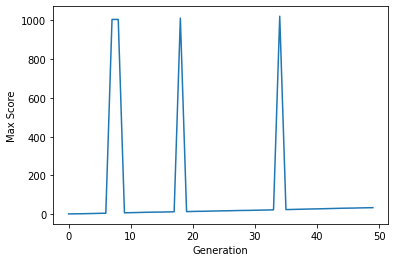

In [6]:
#fitness curves
x = []
y = []
for gen in gens:
    x.append(gen)

for max_ in maxes:
    y.append(max_)
plt.xlabel('Generation')
plt.ylabel('Max Score')
plt.plot(x, y)
plt.show()

In [7]:
for team in searchManager.winners:
    print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
    print(team.fitness)
    print('Learners:')
    for learner in team.learners:
        print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
    print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$
1005.25
Learners:
Region: [0, 0, 0, 2] --> Action: [2, 3]
Region: [0, 0, 4, 4] --> Action: [2, 3]
Region: [1, 3, 0, 1] --> Action: [0, 1]
Region: [1, 3, 3, 3] --> Action: [0, 1]
Region: [0, 2, 1, 4] --> Action: [2, 3]
Region: [1, 0, 8, 8] --> Action: [0, 1]
Region: [0, 9, 0, 6] --> Action: [2, 3]
Region: [0, 9, 8, 9] --> Action: [2, 3]
Region: [1, 7, 1, 9] --> Action: [0, 1]
Region: [0, 0, 6, 8] --> Action: [2, 3]
Region: [1, 9, 0, 4] --> Action: [0, 1]
$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$
1005.25
Learners:
Region: [0, 0, 0, 2] --> Action: [2, 3]
Region: [0, 0, 4, 4] --> Action: [2, 3]
Region: [1, 3, 0, 1] --> Action: [0, 1]
Region: [1, 3, 3, 3] --> Action: [0, 1]
Region: [0, 2, 1, 4] --> Action: [2, 3]
Region: [1, 0, 8, 8] --> Action: [0, 1]
Region: [0, 9, 0, 6] --> Action: [2, 3]
Region: [0, 9, 8, 9] --> Action: [2, 3]
Region: [1, 7, 1, 9] --> Action: [0, 1]
Region: [0

In [8]:
team = searchManager.winners[0]
for learner in team.learners:
    print(learner.program.rule.region)

for i in range(5):
    print(f'Epoch: {i+1} --------')
    env.reset()
    win = False
    selected_learner = team.select_learner(env)
    while not win:
        win, needs_update, reward, winning_action = team.q_evaluation(env, selected_learner)
        print(reward)
        if not win:
            selected_learner = team.select_learner(env)
            team.transition_update(reward, winning_action, needs_update, selected_learner)

    team.final_update(reward, winning_action, needs_update)

print(win)
for learner in team.learners:
    print(f'{learner.program.rule.region}')
    for i in range(len(learner.program.rule.action_set)):
          print(f'{learner.program.rule.action_set[i]} --> {learner.program.rule.value_set[i]}')

[0, 0, 0, 2]
[0, 0, 4, 4]
[1, 3, 0, 1]
[1, 3, 3, 3]
[0, 2, 1, 4]
[1, 0, 8, 8]
[0, 9, 0, 6]
[0, 9, 8, 9]
[1, 7, 1, 9]
[0, 0, 6, 8]
[1, 9, 0, 4]
Epoch: 1 --------
[1, 3, 0, 1]
Winning action: 0
0.1
[0, 2, 1, 4]
Winning action: 3
0.1


ValueError: empty range for randrange() (0, 0, 0)